使用 load_dataset_builder() 函數載入資料集建構器並檢查資料集的屬性，而無需下載它：

In [1]:
from datasets import load_dataset_builder

ds_builder = load_dataset_builder("emotion")

#Inspect dataset description
ds_builder.info.description

''

In [2]:
#Inspect dataset features
ds_builder.info.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [3]:
from datasets import load_dataset

emotions = load_dataset('emotion')
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [13]:
from datasets import load_dataset
load_dataset('emotion',split="train")

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [1]:
from datasets import load_dataset

dataset = load_dataset("emotion")
dataset.set_format(type='arrow')
dataset['train']

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [3]:
train_ds = dataset["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

**configurations**

In [ ]:
from datasets import get_dataset_config_names
configs = get_dataset_config_names('PolyAI/minds14')
configs

In [4]:
len(train_ds)

16000

In [5]:
train_ds[0]

pyarrow.Table
text: string
label: int64
----
text: [["i didnt feel humiliated"]]
label: [[0]]

In [6]:
train_ds.column_names

['text', 'label']

In [7]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [8]:
train_ds[:5]

pyarrow.Table
text: string
label: int64
----
text: [["i didnt feel humiliated","i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake","im grabbing a minute to post i feel greedy wrong","i am ever feeling nostalgic about the fireplace i will know that it is still on the property","i am feeling grouchy"]]
label: [[0,0,3,2,3]]

In [9]:
train_ds['text'][:5]

[
  [
    "i didnt feel humiliated",
    "i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake",
    "im grabbing a minute to post i feel greedy wrong",
    "i am ever feeling nostalgic about the fireplace i will know that it is still on the property",
    "i am feeling grouchy"
  ]
]

In [15]:
import pandas as pd

emotions = load_dataset('emotion')
emotions.set_format(type="pandas")
df = emotions['train'][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [32]:
emotions['train'].features['label'].int2str(0)

'sadness'

In [33]:
def label_int2str(row):
    return emotions['train'].features['label'].int2str(row)

df['label_name'] = df['label'].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [34]:
df['label_name'].value_counts()

label_name
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

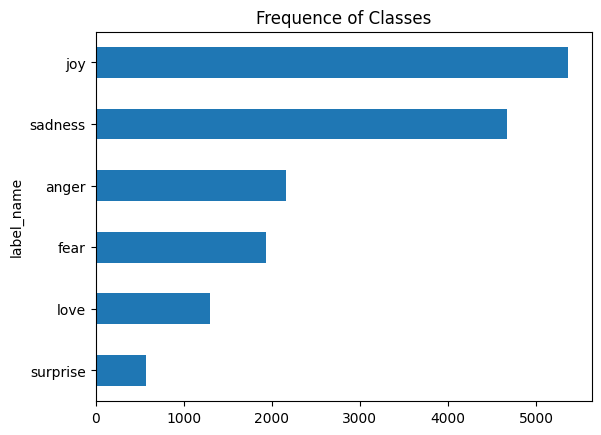

In [36]:
import matplotlib.pyplot as plt

df['label_name'].value_counts(ascending=True).plot.barh()
plt.title('Frequence of Classes')
plt.show()